In [ ]:
# Step 1: Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

import joblib

In [ ]:
# Load the dataset
df_og = pd.read_csv("/content/one_hot.csv")

In [ ]:
# Display the first few rows of the original data
print("Original DataFrame:")
df_og.head()

Original DataFrame:


,Name,# of Positions,Degree,Course,College,CGPA,HSC,SSC,Additional Info,# of tech skills,...,Public Relations,Public Speaking,Recruitment,Report Writing,Risk Management,Sales,Strategic Planning,Team Building,Time Management,Vendor Management
0,Vaishnavi Arolkar,5,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,8.77,NaN,NaN,"{'Key Values': {'cgpa': '8.77', 'skills': 'Tim...",13,...,0,0,0,0,0,0,0,0,1,0
1,Kundan Choudhary,0,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.20,NaN,NaN,"{'Key Values': {}, 'Languages': [], 'Certifica...",3,...,0,0,0,0,0,1,0,0,0,0
2,Vikram Choudhary,2,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.05,NaN,NaN,"{'Key Values': {'cgpa': '7.05'}, 'Languages': ...",11,...,0,0,0,0,0,0,0,0,0,0
3,Anushri Deshmukh,6,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,8.25,NaN,NaN,"{'Key Values': {'skills': 'Python, Java, HTML,...",11,...,0,0,0,0,0,0,0,0,1,0
4,Raj Gandhi,3,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.75,NaN,NaN,"{'Key Values': {'skills': 'OOPs,'}, 'Languages...",6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Impute missing CGPA values using KNN Imputer
imputer = KNNImputer(n_neighbors=5)
df_og['CGPA'] = imputer.fit_transform(df_og[['CGPA']])

In [ ]:
# Display the data after imputation
print("\nDataFrame after CGPA Imputation:")
df_og.head()


DataFrame after CGPA Imputation:


,Name,# of Positions,Degree,Course,College,CGPA,HSC,SSC,Additional Info,# of tech skills,...,Public Relations,Public Speaking,Recruitment,Report Writing,Risk Management,Sales,Strategic Planning,Team Building,Time Management,Vendor Management
0,Vaishnavi Arolkar,5,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,8.77,NaN,NaN,"{'Key Values': {'cgpa': '8.77', 'skills': 'Tim...",13,...,0,0,0,0,0,0,0,0,1,0
1,Kundan Choudhary,0,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.20,NaN,NaN,"{'Key Values': {}, 'Languages': [], 'Certifica...",3,...,0,0,0,0,0,1,0,0,0,0
2,Vikram Choudhary,2,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.05,NaN,NaN,"{'Key Values': {'cgpa': '7.05'}, 'Languages': ...",11,...,0,0,0,0,0,0,0,0,0,0
3,Anushri Deshmukh,6,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,8.25,NaN,NaN,"{'Key Values': {'skills': 'Python, Java, HTML,...",11,...,0,0,0,0,0,0,0,0,1,0
4,Raj Gandhi,3,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.75,NaN,NaN,"{'Key Values': {'skills': 'OOPs,'}, 'Languages...",6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Drop irrelevant columns
df_og = df_og.drop(['College', 'HSC', 'SSC', 'Additional Info'], axis=1)

In [ ]:
# One-hot encode specific categorical columns
columns_to_encode = ['Degree', 'Course']
df_og = pd.get_dummies(df_og, columns=columns_to_encode, drop_first=False)

In [ ]:
# Display the data after one-hot encoding
print("\nDataFrame after One-Hot Encoding:")
df_og.head()


DataFrame after One-Hot Encoding:


,Name,# of Positions,CGPA,# of tech skills,# of non tech skills,Role,Company,AI,AWS,Agile,...,Sales,Strategic Planning,Team Building,Time Management,Vendor Management,Degree_Bachelor of Technology,Course_Computer Engineering,Course_Computer Networks,Course_Computer Science and Engineering,Course_Electronics Engineering
0,Vaishnavi Arolkar,5,8.77,13,4,SDE,Citius Tech,0,0,0,...,0,0,0,1,0,True,False,False,False,True
1,Kundan Choudhary,0,7.20,3,1,SDE,Barclays,0,0,0,...,1,0,0,0,0,True,False,False,False,True
2,Vikram Choudhary,2,7.05,11,0,Analyst,KPMG,0,0,0,...,0,0,0,0,0,True,False,False,False,True
3,Anushri Deshmukh,6,8.25,11,4,Associate Consultant,Oracle,0,0,0,...,0,0,0,1,0,True,False,False,False,True
4,Raj Gandhi,3,7.75,6,2,SDE,BNP Paribas CIB,0,0,0,...,0,0,0,0,0,True,False,False,False,True


In [ ]:
# Keep the 'Name' column for final predictions
df = df_og.copy()

# Remove 'Name' from df for model training
df_model = df.drop(['Name'], axis=1)

In [ ]:
# Duplicate data to increase size
df_model = pd.concat([df_model, df_model.copy()], ignore_index=True)

In [ ]:
# Step 3: Separate Data for Role and Company Prediction

# Role Prediction Data
df_role = df_model.dropna(subset=['Role'])
X_role = df_role.drop(['Role', 'Company'], axis=1)
Y_role = df_role['Role']

In [ ]:
# Company Prediction Data
df_company = df_model.dropna(subset=['Company'])
X_company = df_company.drop(['Role', 'Company'], axis=1)
Y_company = df_company['Company']

In [ ]:
# Display the first few rows of features and targets
print("\nFeatures for Role Prediction:")
X_role.head()


Features for Role Prediction:


,# of Positions,CGPA,# of tech skills,# of non tech skills,AI,AWS,Agile,Amazon Web Services,Android Development,Apache,...,Sales,Strategic Planning,Team Building,Time Management,Vendor Management,Degree_Bachelor of Technology,Course_Computer Engineering,Course_Computer Networks,Course_Computer Science and Engineering,Course_Electronics Engineering
0,5,8.77,13,4,0,0,0,0,0,1,...,0,0,0,1,0,True,False,False,False,True
1,0,7.20,3,1,0,0,0,0,0,0,...,1,0,0,0,0,True,False,False,False,True
2,2,7.05,11,0,0,0,0,0,0,0,...,0,0,0,0,0,True,False,False,False,True
3,6,8.25,11,4,0,0,0,0,0,0,...,0,0,0,1,0,True,False,False,False,True
4,3,7.75,6,2,0,0,0,0,0,0,...,0,0,0,0,0,True,False,False,False,True


In [ ]:
print("\nTarget for Role Prediction:")
Y_role.head()


Target for Role Prediction:


,Role
0,SDE
1,SDE
2,Analyst
3,Associate Consultant
4,SDE


In [ ]:
# Step 4: Data Scaling and Encoding

# Standardize features
scaler_role = StandardScaler()
X_role_scaled = scaler_role.fit_transform(X_role)

scaler_company = StandardScaler()
X_company_scaled = scaler_company.fit_transform(X_company)

In [ ]:
# One-hot encode target variables
ohe_role = OneHotEncoder(sparse_output=False)
Y_role_encoded = ohe_role.fit_transform(Y_role.values.reshape(-1, 1))

ohe_company = OneHotEncoder(sparse_output=False)
Y_company_encoded = ohe_company.fit_transform(Y_company.values.reshape(-1, 1))

In [ ]:
# Display scaled features
print("\nScaled Features for Role Prediction:")
pd.DataFrame(X_role_scaled, columns=X_role.columns).head()


Scaled Features for Role Prediction:


,# of Positions,CGPA,# of tech skills,# of non tech skills,AI,AWS,Agile,Amazon Web Services,Android Development,Apache,...,Sales,Strategic Planning,Team Building,Time Management,Vendor Management,Degree_Bachelor of Technology,Course_Computer Engineering,Course_Computer Networks,Course_Computer Science and Engineering,Course_Electronics Engineering
0,0.760149,1.098379,0.494091,1.860181,-0.264575,-0.338502,-0.197066,-0.338502,-0.097129,4.102845,...,-0.355409,-0.097129,-0.138013,4.102845,-0.097129,0.0,-0.303046,-0.097129,-0.138013,0.355409
1,-1.450067,-1.526107,-1.493418,-0.257259,-0.264575,-0.338502,-0.197066,-0.338502,-0.097129,-0.243733,...,2.813657,-0.097129,-0.138013,-0.243733,-0.097129,0.0,-0.303046,-0.097129,-0.138013,0.355409
2,-0.565980,-1.776854,0.096589,-0.963072,-0.264575,-0.338502,-0.197066,-0.338502,-0.097129,-0.243733,...,-0.355409,-0.097129,-0.138013,-0.243733,-0.097129,0.0,-0.303046,-0.097129,-0.138013,0.355409
3,1.202192,0.229123,0.096589,1.860181,-0.264575,-0.338502,-0.197066,-0.338502,-0.097129,-0.243733,...,-0.355409,-0.097129,-0.138013,4.102845,-0.097129,0.0,-0.303046,-0.097129,-0.138013,0.355409
4,-0.123937,-0.606701,-0.897165,0.448554,-0.264575,-0.338502,-0.197066,-0.338502,-0.097129,-0.243733,...,-0.355409,-0.097129,-0.138013,-0.243733,-0.097129,0.0,-0.303046,-0.097129,-0.138013,0.355409


In [ ]:
# Step 5: Train-Test Split

# Role Prediction
X_role_train, X_role_test, Y_role_train, Y_role_test = train_test_split(
    X_role_scaled, Y_role_encoded, test_size=0.2, random_state=42)

# Company Prediction
X_company_train, X_company_test, Y_company_train, Y_company_test = train_test_split(
    X_company_scaled, Y_company_encoded, test_size=0.2, random_state=42)

In [ ]:
# Step 6: Model Training

# Role Prediction Model
role_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
role_history = role_model.fit(X_role_train, np.argmax(Y_role_train, axis=1))

# Company Prediction Model
company_model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
company_history = company_model.fit(X_company_train, np.argmax(Y_company_train, axis=1))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
# Step 7: Model Evaluation

# Role Prediction Evaluation
Y_role_pred = role_model.predict(X_role_test)
Y_role_prob = role_model.predict_proba(X_role_test)
role_accuracy = accuracy_score(np.argmax(Y_role_test, axis=1), Y_role_pred)
print(f"\nRole Prediction Accuracy: {role_accuracy:.4f}")


Role Prediction Accuracy: 0.6744


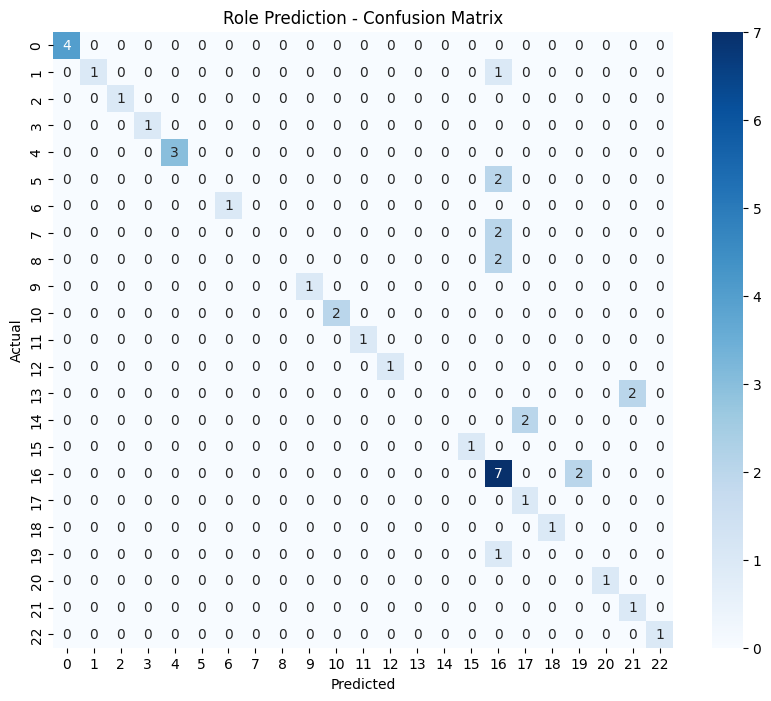

In [ ]:
# Confusion Matrix
role_conf_matrix = confusion_matrix(np.argmax(Y_role_test, axis=1), Y_role_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(role_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Role Prediction - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Classification Report
print("\nClassification Report for Role Prediction:")
print(classification_report(np.argmax(Y_role_test, axis=1), Y_role_pred))


Classification Report for Role Prediction:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           4       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         2
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         1
          20       0.00      0.00      0.00         2
          27       0.00      0.00      0.00         2
          29       1.00      1.00      1.00         1
          31       0.47      0.78    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Check for class imbalance
from collections import Counter
print(Counter(np.argmax(Y_role_test, axis=1)))

Counter({31: 9, 0: 4, 6: 3, 11: 2, 1: 2, 15: 2, 9: 2, 7: 2, 27: 2, 20: 2, 8: 1, 35: 1, 17: 1, 34: 1, 38: 1, 12: 1, 29: 1, 32: 1, 44: 1, 3: 1, 4: 1, 18: 1, 45: 1})


In [ ]:
# Company Prediction Evaluation
Y_company_pred = company_model.predict(X_company_test)
Y_company_prob = company_model.predict_proba(X_company_test)
company_accuracy = accuracy_score(np.argmax(Y_company_test, axis=1), Y_company_pred)
print(f"\nCompany Prediction Accuracy: {company_accuracy:.4f}")


Company Prediction Accuracy: 0.8140


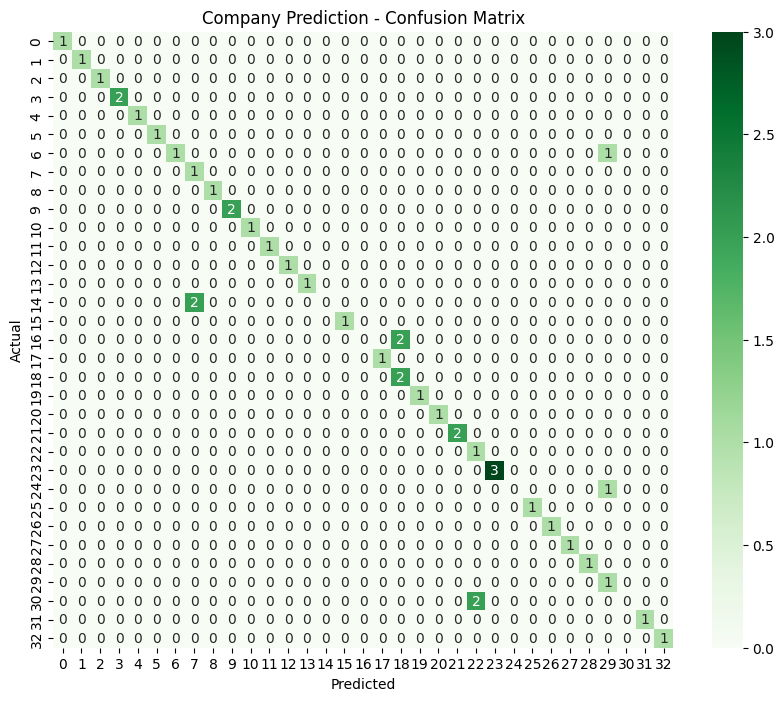

In [ ]:
# Confusion Matrix
company_conf_matrix = confusion_matrix(np.argmax(Y_company_test, axis=1), Y_company_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(company_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.title('Company Prediction - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
# Classification Report
print("\nClassification Report for Company Prediction:")
print(classification_report(np.argmax(Y_company_test, axis=1), Y_company_pred))


Classification Report for Company Prediction:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      0.50      0.67         2
          15       0.33      1.00      0.50         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         1
          22       1.00      1.00      1.00         1
          24       1.00      1.00      1.00         1
          25       1.00      1.00      1.00         1
          26       0.00      0.00      0.00         2
          27       1.00      1.00      1.00         1
          31       0.00      0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Step 8: Feature Importance Visualization

def plot_feature_importance(model, feature_names, top_n=10, title="Feature Importance"):
    # For Logistic Regression, coefficients represent feature importance
    importance = np.abs(model.coef_).mean(axis=0)
    sorted_idx = np.argsort(importance)[::-1][:top_n]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=importance[sorted_idx], y=np.array(feature_names)[sorted_idx])
    plt.title(title)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()

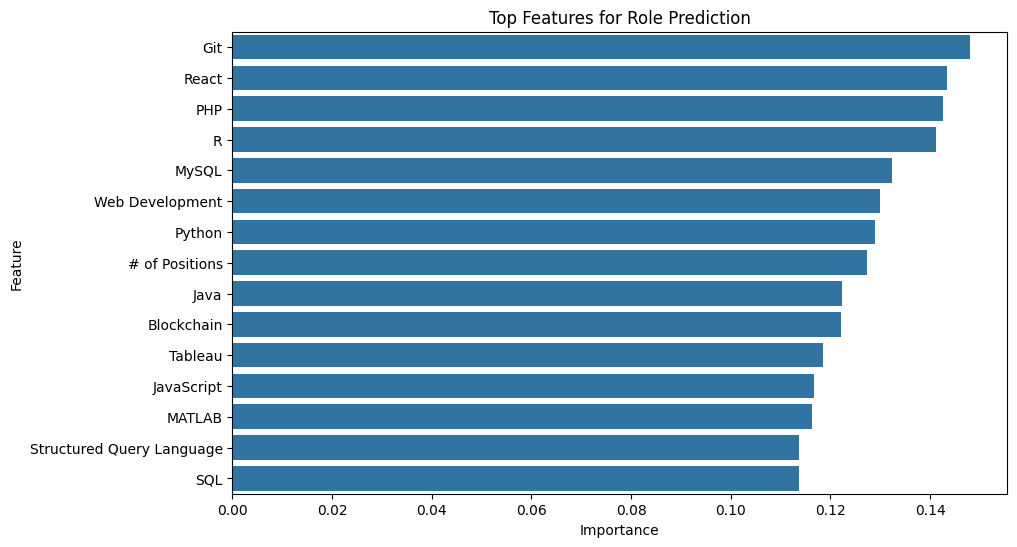

In [ ]:
# Top Features for Role Prediction
plot_feature_importance(role_model, X_role.columns, top_n=15, title="Top Features for Role Prediction")

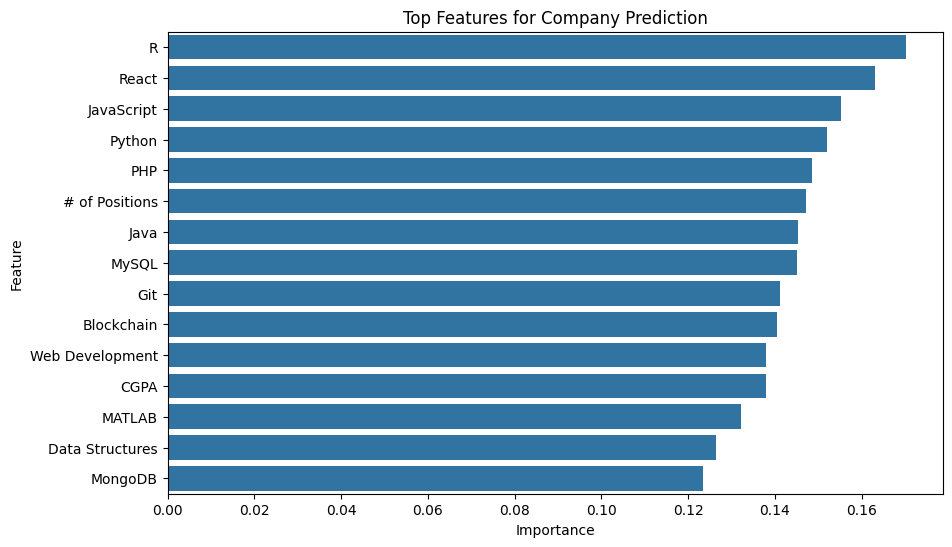

In [ ]:
# Top Features for Company Prediction
plot_feature_importance(company_model, X_company.columns, top_n=15, title="Top Features for Company Prediction")

In [ ]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

# Precision-Recall curve for Role Prediction
precision = {}
recall = {}
for i in range(36):
    precision[i], recall[i], _ = precision_recall_curve(Y_role_test[:, i], Y_role_prob[:, i])

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive class found in y_true, recall is set to one for all thresholds.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1030: UserWarning: No positive c

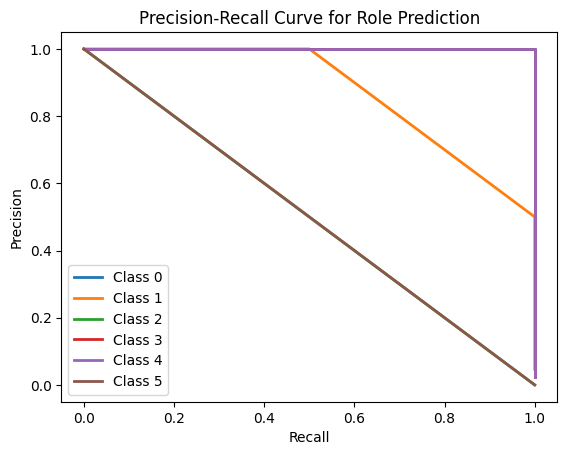

In [ ]:
# Plot the Precision-Recall curves for each class
for i in range(0, 6):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Role Prediction')
plt.legend(loc="best")
plt.show()

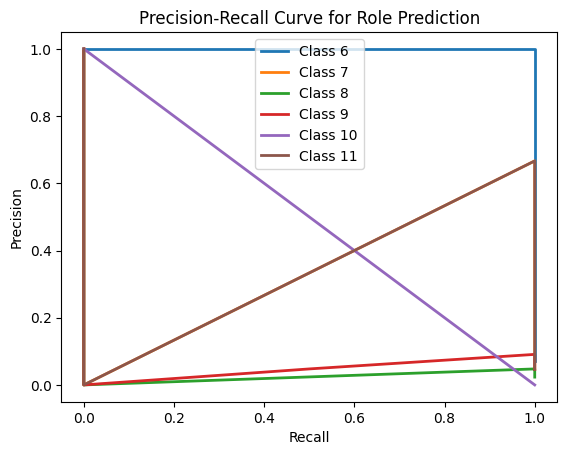

In [ ]:
for i in range(6, 12):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Role Prediction')
plt.legend(loc="best")
plt.show()

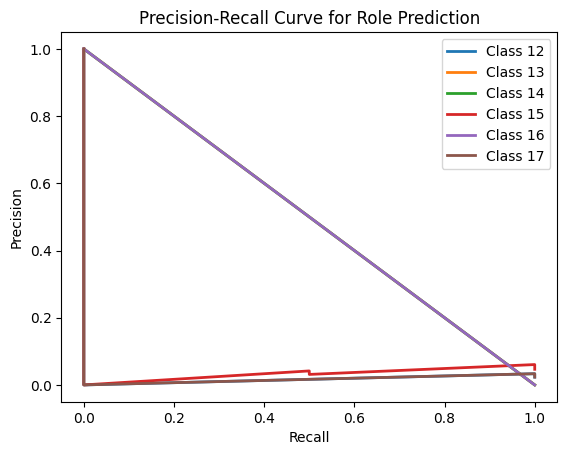

In [ ]:
for i in range(12, 18):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Role Prediction')
plt.legend(loc="best")
plt.show()

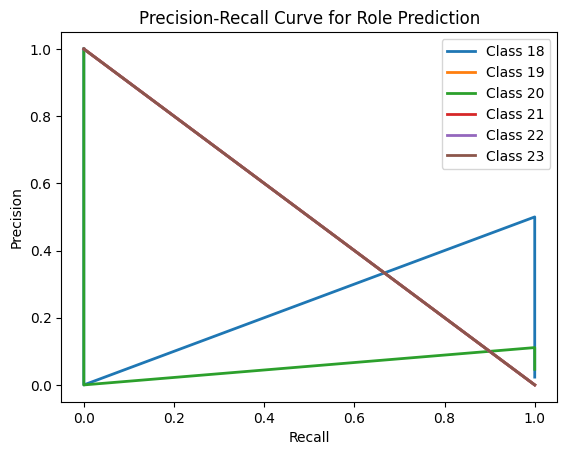

In [ ]:
for i in range(18, 24):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Role Prediction')
plt.legend(loc="best")
plt.show()

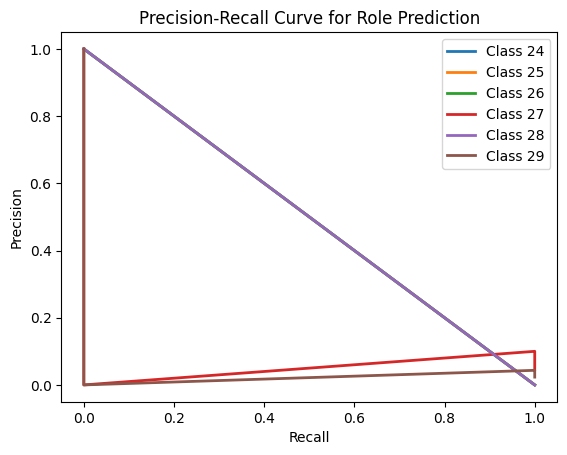

In [ ]:
for i in range(24, 30):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Role Prediction')
plt.legend(loc="best")
plt.show()

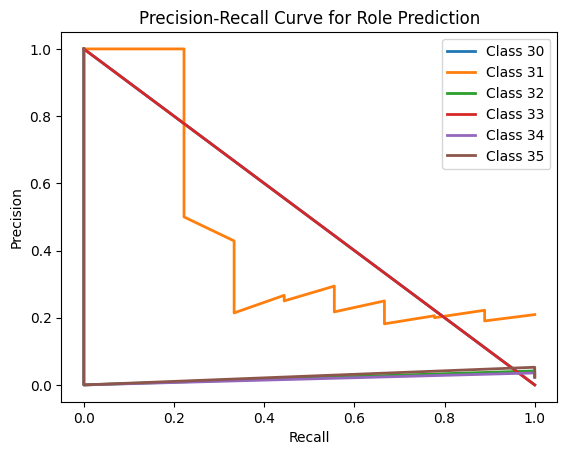

In [ ]:
for i in range(30, 36):
    plt.plot(recall[i], precision[i], lw=2, label=f'Class {i}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for Role Prediction')
plt.legend(loc="best")
plt.show()

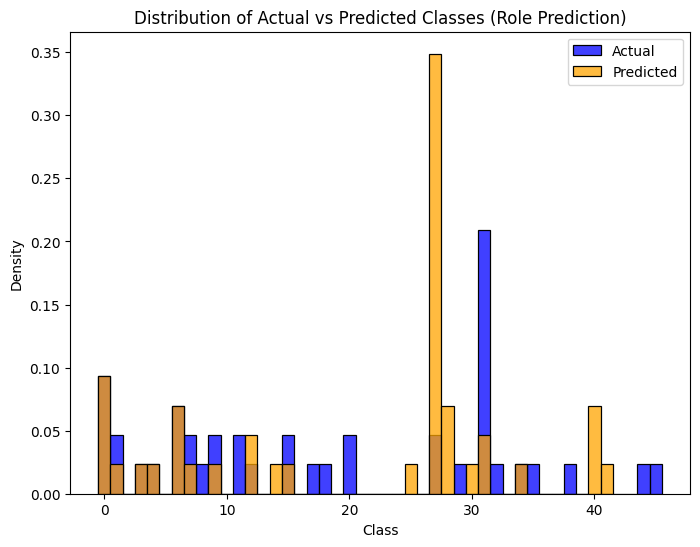

In [ ]:
# Plotting the distribution of predicted vs actual classes for Role Prediction
plt.figure(figsize=(8,6))
sns.histplot(np.argmax(Y_role_test, axis=1), color='blue', label='Actual', kde=False, stat="density", discrete=True)
sns.histplot(np.argmax(Y_role_prob, axis=1), color='orange', label='Predicted', kde=False, stat="density", discrete=True)
plt.legend(loc="best")
plt.title("Distribution of Actual vs Predicted Classes (Role Prediction)")
plt.xlabel("Class")
plt.ylabel("Density")
plt.show()


In [ ]:
# Step 9: Functions for Top N Predictions for a Given Name

def preprocess_input(df, name, scaler, columns):
    # Extract the data for the given name
    data = df[df['Name'] == name]
    if data.empty:
        raise ValueError(f"No data found for the name: {name}")
    X_data = data.drop(['Name', 'Role', 'Company'], axis=1)
    X_data = X_data[columns]  # Ensure columns are in the same order
    X_scaled = scaler.transform(X_data)
    return X_scaled

In [ ]:
def get_top_n_predictions(probs, target_names, top_n=5):
    top_indices = np.argsort(probs)[::-1][:top_n]
    top_probs = probs[top_indices]
    top_classes = target_names[top_indices]
    return list(zip(top_classes, top_probs))

In [ ]:
def predict_top_n_roles_and_companies(df, name, role_model, company_model, ohe_role, ohe_company, scaler_role, scaler_company, top_n=5):
    # Preprocess input for role prediction
    X_role_input = preprocess_input(df, name, scaler_role, X_role.columns)
    role_probs = role_model.predict_proba(X_role_input)[0]
    role_target_names = ohe_role.categories_[0]
    top_roles = get_top_n_predictions(role_probs, role_target_names, top_n=top_n)

    # Preprocess input for company prediction
    X_company_input = preprocess_input(df, name, scaler_company, X_company.columns)
    company_probs = company_model.predict_proba(X_company_input)[0]
    company_target_names = ohe_company.categories_[0]
    top_companies = get_top_n_predictions(company_probs, company_target_names, top_n=top_n)

    return top_roles, top_companies

In [ ]:
# Example usage:
name = "Basuri Bhujade"  # Replace with an actual name from your dataset
try:
    top_roles, top_companies = predict_top_n_roles_and_companies(df, name, role_model, company_model, ohe_role, ohe_company, scaler_role, scaler_company, top_n=5)

    print(f"\nTop 5 Predicted Roles for {name}:")
    for role, prob in top_roles:
        print(f"Role: {role}, Probability: {prob:.4f}")

    print(f"\nTop 5 Predicted Companies for {name}:")
    for company, prob in top_companies:
        print(f"Company: {company}, Probability: {prob:.4f}")
except ValueError as e:
    print(e)


Top 5 Predicted Roles for Basuri Bhujade:
Role: Assistant Product Manager, Probability: 0.9563
Role: Analyst, Probability: 0.0113
Role: Associate SDE , Probability: 0.0090
Role: Business Analyst, Probability: 0.0089
Role: Associate Consultant , Probability: 0.0033

Top 5 Predicted Companies for Basuri Bhujade:
Company: Transunioun, Probability: 0.9552
Company: PhonePe, Probability: 0.0097
Company: JPMC, Probability: 0.0087
Company: KPMG, Probability: 0.0048
Company: ISS , Probability: 0.0028


In [ ]:
def predict_combined(name, top_n):
    top_roles, top_companies = predict_top_n_roles_and_companies(df, name, role_model, company_model, ohe_role, ohe_company, scaler_role, scaler_company, top_n=5)

    # Multiply Role and Company Probabilities
    combined_predictions = []
    for role, role_prob in top_roles:
        for company, company_prob in top_companies:
            combined_prob = role_prob * company_prob  # Multiply probabilities
            combined_predictions.append((role, company, combined_prob))

    # Sort combined predictions by probability in descending order
    combined_predictions.sort(key=lambda x: x[2], reverse=True)

    return combined_predictions[:top_n]

In [ ]:
# Example usage:
name = "Basuri Bhujade"  # Replace with an actual name from your dataset
try:
    top_predictions = predict_combined(name, top_n=5)

    print(f"\nTop 5 Predicted Roles and Companies with Multiplied Probabilities for {name}:")
    idx = 1
    for role, company, prob in top_predictions:
        print(f"{idx}) {role}, {company}, Probability: {prob:.4f}")
        idx += 1

except ValueError as e:
    print(e)


Top 5 Predicted Roles and Companies with Multiplied Probabilities for Basuri Bhujade:
1) Assistant Product Manager, Transunioun, Probability: 0.9134
2) Analyst, Transunioun, Probability: 0.0108
3) Assistant Product Manager, PhonePe, Probability: 0.0093
4) Associate SDE , Transunioun, Probability: 0.0086
5) Business Analyst, Transunioun, Probability: 0.0085


In [ ]:
# Step 10: Save Models and Encoders

joblib.dump(role_model, 'role_logistic_model.pkl')
joblib.dump(company_model, 'company_logistic_model.pkl')
joblib.dump(ohe_role, 'ohe_role.pkl')
joblib.dump(ohe_company, 'ohe_company.pkl')
joblib.dump(scaler_role, 'scaler_role.pkl')
joblib.dump(scaler_company, 'scaler_company.pkl')

['scaler_company.pkl']